In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img = cv2.imread('image_01.png')[:,:,::-1]
exmask = cv2.imread('exudates_mask.png', cv2.IMREAD_GRAYSCALE)
vesmask = cv2.imread('vessels_mask.png', cv2.IMREAD_GRAYSCALE)

def get_mask_bounding_box(mask):
    mask = mask > 0
    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

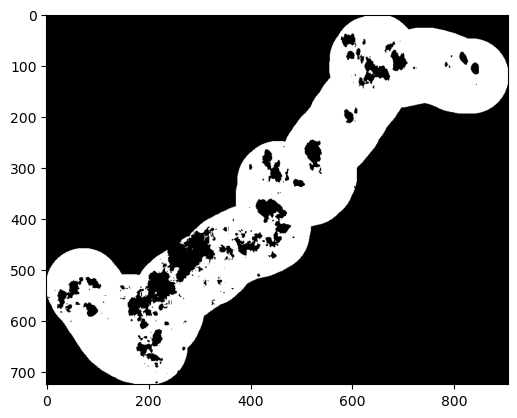

In [74]:
from skimage.feature import canny

from skimage.filters import try_all_threshold, threshold_multiotsu, threshold_isodata, threshold_mean, threshold_otsu, threshold_yen, threshold_sauvola, threshold_niblack


test_mask = exmask

bb_ex = get_mask_bounding_box(test_mask)
roi_img = img[bb_ex[0]:bb_ex[1], bb_ex[2]:bb_ex[3]]
roi_mask = test_mask[bb_ex[0]:bb_ex[1], bb_ex[2]:bb_ex[3]].astype(bool)

roi_img = cv2.cvtColor(roi_img, cv2.COLOR_RGB2GRAY) / 255.


t = threshold_otsu(roi_img[roi_mask])
# t = threshold_yen(roi_img[roi_mask])
# t = threshold_mean(roi_img[roi_mask])
# t = threshold_isodata(roi_img[roi_mask])
# t = threshold_sauvola(roi_img[roi_mask])
# t = threshold_niblack(1-roi_img[roi_mask])
v = roi_img[roi_mask] < t
refined_mask = np.zeros_like(roi_mask)
refined_mask[roi_mask] = v
plt.imshow(refined_mask, cmap='gray')

plt.show()